<a href="https://colab.research.google.com/github/baekka1/Crop-Yield-Prediction/blob/main/Analyze_spatial_weather_heterogeneity_by_clustering_climate_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()
df = pd.read_csv("all_feature_data_avg.csv")

# Check data
df.head()

Saving all_feature_data_avg.csv to all_feature_data_avg (1).csv


,Unnamed: 0,year_index,index,id2,year,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th
0,0,0,1,112,1980,27.0,302.547299,88.534865,4.169133,0.010406,244.856055,1.477316,34.108888,2.150448,287.698991,182.028998
1,1,1,2,113,1980,28.0,302.068878,85.865079,3.564974,0.010097,243.893545,1.461499,34.400296,2.342725,287.706825,192.143968
2,2,2,3,119,1980,29.0,303.100471,91.763880,3.560391,0.011191,251.878185,1.429625,36.004177,2.067676,288.491839,178.083970
3,3,3,4,120,1980,28.0,302.966961,88.569844,3.964970,0.010669,250.073255,1.484913,35.960727,2.714061,288.009203,192.123030
4,4,4,5,124,1980,24.0,303.312180,89.555033,3.494477,0.011313,254.001956,1.481304,36.824029,2.435780,289.358179,176.449627


# Apply Scalar to Data


In [21]:
from sklearn.preprocessing import StandardScaler

weather_data = df[['tmmx', 'rmax', 'vs', 'sph', 'srad', 'vpd', 'rmin', 'pr', 'tmmn', 'th']]

scaler = StandardScaler()
weather_scaled = pd.DataFrame(scaler.fit_transform(weather_data), columns=weather_data.columns)

display(weather_scaled.head())

,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th
0,0.413096,-0.187249,-0.006969,-0.028098,1.287027,0.021913,-0.700090,-0.109649,0.239040,-0.199320
1,0.369648,-0.416426,-0.061761,-0.028126,1.229632,0.020473,-0.677168,-0.092178,0.239749,0.331956
2,0.463333,0.089933,-0.062176,-0.028026,1.705766,0.017570,-0.551007,-0.117170,0.310740,-0.406528
3,0.451208,-0.184246,-0.025484,-0.028074,1.598136,0.022605,-0.554425,-0.058436,0.267094,0.330857
4,0.482559,-0.099676,-0.068154,-0.028015,1.832410,0.022276,-0.486518,-0.083722,0.389087,-0.492369


# Find Optimal Number of Clusters

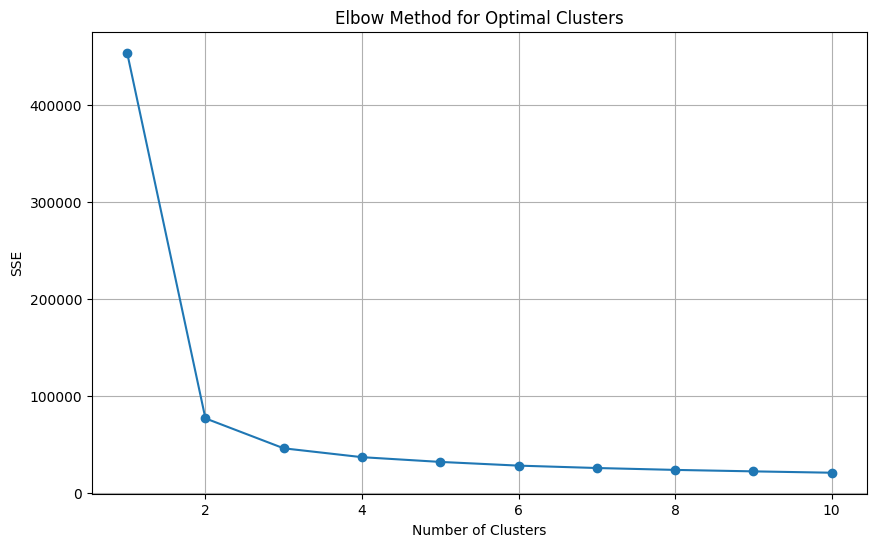

In [11]:
from sklearn.cluster import KMeans

sse = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init explicitly
    kmeans.fit(weather_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

## Perform k-means clustering




In [12]:
from sklearn.cluster import KMeans

# Assuming 10 is the optimal number of clusters based on the elbow method plot
n_clusters = 10

kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_model.fit(weather_scaled)

KMeans(n_clusters=10, n_init=10, random_state=42)

## Assign clusters to counties




In [13]:
df['climate_region'] = kmeans_model.labels_
display(df.head())

,Unnamed: 0,year_index,index,id2,year,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th,climate_region
0,0,0,1,112,1980,27.0,302.547299,88.534865,4.169133,0.010406,244.856055,1.477316,34.108888,2.150448,287.698991,182.028998,6
1,1,1,2,113,1980,28.0,302.068878,85.865079,3.564974,0.010097,243.893545,1.461499,34.400296,2.342725,287.706825,192.143968,2
2,2,2,3,119,1980,29.0,303.100471,91.763880,3.560391,0.011191,251.878185,1.429625,36.004177,2.067676,288.491839,178.083970,6
3,3,3,4,120,1980,28.0,302.966961,88.569844,3.964970,0.010669,250.073255,1.484913,35.960727,2.714061,288.009203,192.123030,5
4,4,4,5,124,1980,24.0,303.312180,89.555033,3.494477,0.011313,254.001956,1.481304,36.824029,2.435780,289.358179,176.449627,6


## Analyze regional yield sensitivity



In [14]:
yield_correlations_by_region = {}

for region, region_df in df.groupby('climate_region'):
    correlation_matrix = region_df.corr()
    yield_correlations = correlation_matrix['yield'].drop('yield')
    yield_correlations_by_region[region] = yield_correlations

for region, correlations in yield_correlations_by_region.items():
    print(f"Climate Region {region}:")
    display(correlations.sort_values(ascending=False))

Climate Region 0:


,yield
year,0.607363
index,0.602641
Unnamed: 0,0.598185
pr,0.315304
tmmn,0.299793
rmin,0.241489
vs,0.186528
sph,0.146065
tmmx,0.043480
srad,-0.030919


Climate Region 1:


,yield
year,0.573306
index,0.573306
Unnamed: 0,0.570298
rmin,0.433267
sph,0.413832
tmmn,0.324705
vs,0.262653
pr,0.240402
th,0.205495
srad,0.161475


Climate Region 2:


,yield
year,0.642672
index,0.637235
Unnamed: 0,0.634724
pr,0.581280
rmin,0.443024
tmmn,0.317924
sph,0.293981
vs,0.157561
tmmx,0.050636
srad,0.011298


Climate Region 3:


,yield
rmax,0.278622
id2,0.082673
year_index,0.062510
rmin,0.045378
vs,0.044327
pr,0.011429
index,-0.028630
year,-0.031250
th,-0.036132
Unnamed: 0,-0.036719


Climate Region 4:


,yield
year,0.655381
index,0.648614
Unnamed: 0,0.643548
vs,0.360359
pr,0.136864
srad,-0.008971
rmin,-0.016267
id2,-0.147799
vpd,-0.152935
th,-0.156169


Climate Region 5:


,yield
year,0.740007
index,0.735891
Unnamed: 0,0.731808
vs,0.321178
rmin,0.293061
pr,0.283391
tmmn,-0.037838
srad,-0.077857
th,-0.123197
sph,-0.163629


Climate Region 6:


,yield
srad,0.265231
vs,0.253979
Unnamed: 0,0.200446
index,0.192387
year,0.190944
rmax,0.080234
id2,0.077907
year_index,0.043203
pr,-0.037420
vpd,-0.169438


Climate Region 7:


,yield
year,0.672290
index,0.665060
Unnamed: 0,0.663237
vs,0.478519
pr,0.053062
rmin,0.012315
srad,0.006882
th,-0.054477
id2,-0.197428
tmmn,-0.236625


Climate Region 8:


,yield
year,0.516652
index,0.509544
Unnamed: 0,0.504627
tmmn,0.438421
sph,0.351566
tmmx,0.311250
srad,0.256520
pr,0.220068
rmin,0.206400
vpd,0.110367


Climate Region 9:


,yield
year,0.630549
index,0.628317
Unnamed: 0,0.622531
vs,0.108835
pr,0.079803
rmin,0.013184
th,-0.108441
id2,-0.120383
rmax,-0.149745
srad,-0.230135


## Identify sensitive regions



In [31]:
sensitive_regions = {}

print("Regional Yield Sensitivity to Temperature and Precipitation:")

for region, correlations in yield_correlations_by_region.items():
    temp_corr_tmmx = correlations.get('tmmx', None)
    temp_corr_tmmn = correlations.get('tmmn', None)
    pr_corr = correlations.get('pr', None)

    sensitivity_info = []

    # Check for strong temperature sensitivity (absolute correlation >= 0.3 as a threshold)
    if temp_corr_tmmx is not None and temp_corr_tmmx <= -0.3:
        sensitivity_info.append(f"Maximum Temperature (tmmx): {temp_corr_tmmx:.2f}")
    if temp_corr_tmmn is not None and temp_corr_tmmn <= -0.3:
        sensitivity_info.append(f"Minimum Temperature (tmmn): {temp_corr_tmmn:.2f}")

    # Check for strong precipitation sensitivity (absolute correlation >= 0.3 as a threshold)
    if pr_corr is not None and pr_corr <= -0.3:
        sensitivity_info.append(f"Precipitation (pr): {pr_corr:.2f}")

    if sensitivity_info:
        sensitive_regions[region] = sensitivity_info
        print(f"\nClimate Region {region} shows significant sensitivity:")
        for info in sensitivity_info:
            print(f" - {info}")

if not sensitive_regions:
    print("\nNo climate regions show strong sensitivity to temperature or precipitation based on the defined threshold.")



Regional Yield Sensitivity to Temperature and Precipitation:

Climate Region 3 shows significant sensitivity:
 - Maximum Temperature (tmmx): -0.49
 - Minimum Temperature (tmmn): -0.43

Climate Region 4 shows significant sensitivity:
 - Maximum Temperature (tmmx): -0.31

Climate Region 5 shows significant sensitivity:
 - Maximum Temperature (tmmx): -0.40

Climate Region 7 shows significant sensitivity:
 - Maximum Temperature (tmmx): -0.41

Climate Region 9 shows significant sensitivity:
 - Maximum Temperature (tmmx): -0.47
 - Minimum Temperature (tmmn): -0.31


## Visualize climate regions



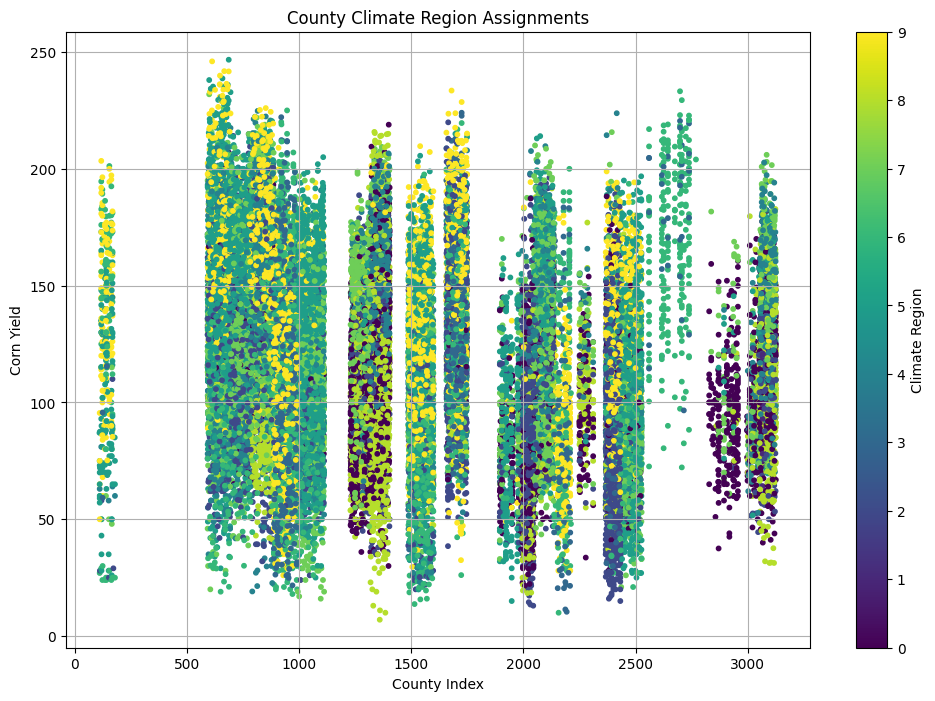

In [33]:
import matplotlib.pyplot as plt

# Create a scatter plot of counties colored by climate region
plt.figure(figsize=(12, 8))
plt.scatter(df.id2, df['yield'], c=df['climate_region'], cmap='viridis', s=10)
plt.xlabel('County Index')
plt.ylabel('Corn Yield')
plt.title('County Climate Region Assignments')
plt.colorbar(label='Climate Region')
plt.grid(True)
plt.show()